In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
data = pd.read_csv("uber.csv")

In [3]:
data.head(5)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
data.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
data = data.drop(['Unnamed: 0'], axis=1)

In [7]:
data = data.drop([ 'key', 'pickup_datetime'], axis=1)

In [8]:
data.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [9]:
data.dropna(inplace=True)

In [10]:
data.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

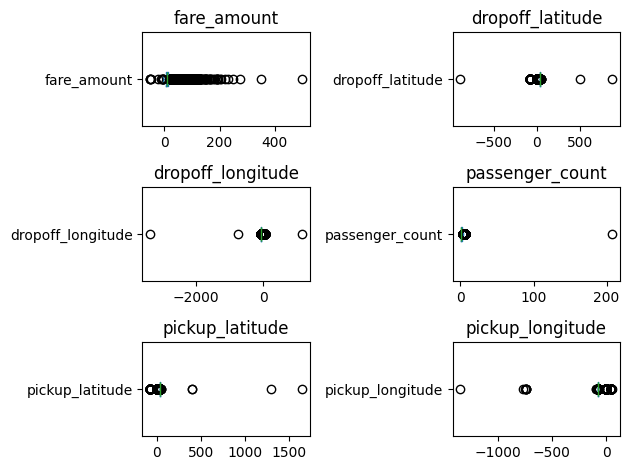

In [11]:
plt.subplot(3,2,1)
plt.title('fare_amount')
data['fare_amount'].plot.box(vert=False)

plt.subplot(3,2,2)
plt.title('dropoff_latitude')
data['dropoff_latitude'].plot.box(vert=False)

plt.subplot(3,2,3)
plt.title('dropoff_longitude')
data['dropoff_longitude'].plot.box(vert=False)

plt.subplot(3,2,4)
plt.title('passenger_count')
data['passenger_count'].plot.box(vert=False)

plt.subplot(3,2,5)
plt.title('pickup_latitude')
data['pickup_latitude'].plot.box(vert=False)

plt.subplot(3,2,6)
plt.title('pickup_longitude')
data['pickup_longitude'].plot.box(vert=False)

plt.tight_layout()


<Axes: ylabel='fare_amount'>

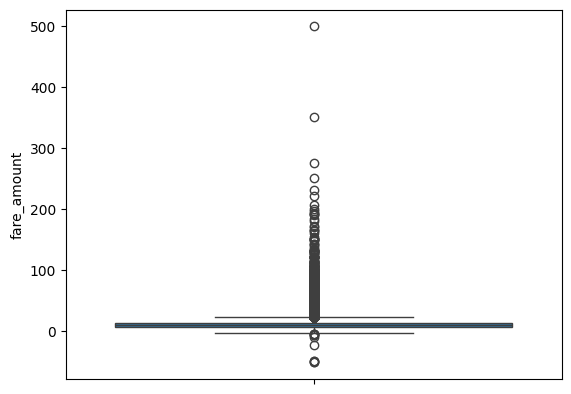

In [12]:
# data['fare_amount'].plot.box(vert=False)
sns.boxplot(data['fare_amount'])

In [13]:
q1 = data['fare_amount'].quantile(0.25)
q3 = data['fare_amount'].quantile(0.75)

IQR = q1 - q3

lower = q1 - 1.5*IQR
upper = q3 - 1.5*IQR

data = data[ (data['fare_amount'] >= lower) & (data['fare_amount'] <= upper)]

<Axes: ylabel='fare_amount'>

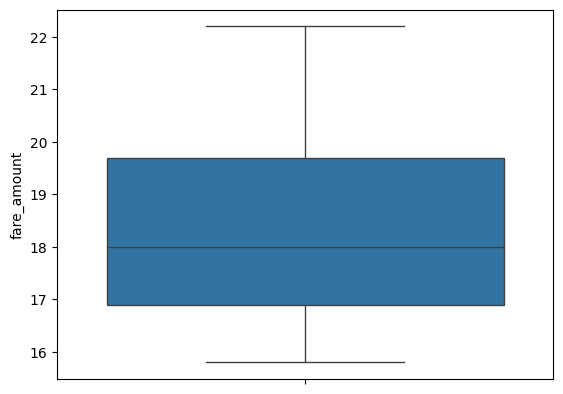

In [14]:
# data['fare_amount'].plot.box(vert=False)
sns.boxplot(data['fare_amount'])

<Axes: xlabel='pickup_longitude', ylabel='fare_amount'>

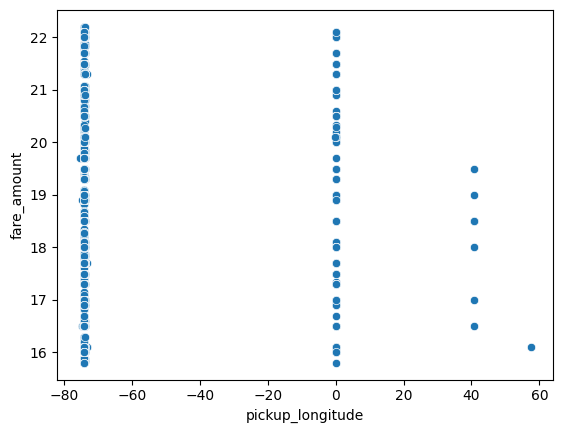

In [29]:
sns.scatterplot(x='pickup_longitude', y='fare_amount', data=data)


<Axes: xlabel='dropoff_longitude', ylabel='fare_amount'>

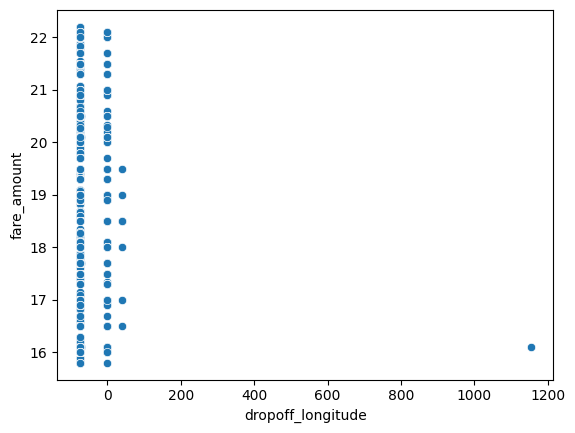

In [28]:
sns.scatterplot(x='dropoff_longitude', y='fare_amount', data=data)

In [15]:
corr = data.corr()

<Axes: >

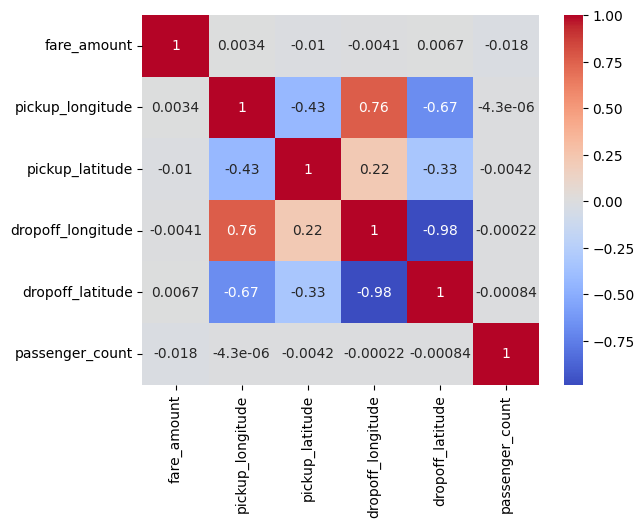

In [16]:
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = data[['dropoff_latitude', 'dropoff_longitude', 'pickup_latitude', 'pickup_longitude', 'passenger_count']]
Y = data['fare_amount']

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [ ]:
lrModel = LinearRegression()
lrModel.fit(X_train, Y_train)

LinearRegression()

In [ ]:
rfModel = RandomForestRegressor(n_estimators=100, random_state=42)
rfModel.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [ ]:
Y_lrPredict = lrModel.predict(X_test)
Y_rfPredict = rfModel.predict(X_test)
print(Y_lrPredict)
print(Y_rfPredict)

[18.41642597 18.42168601 18.42115971 ... 18.31980723 18.42093435
 18.41664897]
[18.125  17.825  19.355  ... 19.405  18.8954 18.771 ]


In [ ]:
from sklearn.metrics import r2_score, root_mean_squared_error

In [ ]:
print("Linear Regression \n")

r2_lr = r2_score(Y_test, Y_lrPredict)
rsme_lr = root_mean_squared_error(Y_test, Y_lrPredict)
print(r2_lr)
print(rsme_lr)

Linear Regression 

-0.278500327221878
2.015471112752563


In [ ]:
print("Rnadom Forest \n")

r2_rf = r2_score(Y_test, Y_rfPredict)
rsme_rf = root_mean_squared_error(Y_test, Y_rfPredict)
print(r2_rf)
print(rsme_rf)

Rnadom Forest 

0.08849814546345636
1.7017859525729058
